In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
# data source: https://www.kaggle.com/datasets/tunguz/online-retail?resource=download

df = pd.read_csv("./data/Online_Retail.csv", encoding = "ISO-8859-1")

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [8]:
missing_values = df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
#clean n/a values
#replace empty descriptions
df['Description'].fillna('No Description', inplace=True)

#drop records with no customer id
df = df.dropna(subset=['CustomerID'])

In [10]:
#transform date format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
#drop records with 0 quantity and unit price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [12]:
summary = df.describe()
print(summary)

            Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000


In [13]:
unique_items = df['Description'].nunique()
print(unique_items)

3877


In [14]:
#new fields
#sales
df['Sales'] = df['Quantity'] * df['UnitPrice']

top_items = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head()


In [15]:
print(top_items)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
Name: Sales, dtype: float64


In [16]:
top_countries = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head()

In [17]:
print(top_countries)

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: Sales, dtype: float64


In [18]:
# Product Popularity: determine most popular products based on quantity sold

In [31]:
# group by description
product_sales = df.groupby('Description').agg(Total_Sold=('Quantity','sum')).reset_index()
product_sales

,Description,Total_Sold
0,4 PURPLE FLOCK DINNER CANDLES,140
1,50'S CHRISTMAS GIFT BAG LARGE,1885
2,DOLLY GIRL BEAKER,2398
3,I LOVE LONDON MINI BACKPACK,360
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3872,ZINC T-LIGHT HOLDER STARS SMALL,4894
3873,ZINC TOP 2 DOOR WOODEN SHELF,10
3874,ZINC WILLIE WINKIE CANDLE STICK,2607
3875,ZINC WIRE KITCHEN ORGANISER,25


In [37]:
product_sales_sorted = product_sales.sort_values(by='Total_Sold', ascending=False)
product_sales_sorted

,Description,Total_Sold
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1762,JUMBO BAG RED RETROSPOT,46181
3698,WHITE HANGING HEART T-LIGHT HOLDER,36725


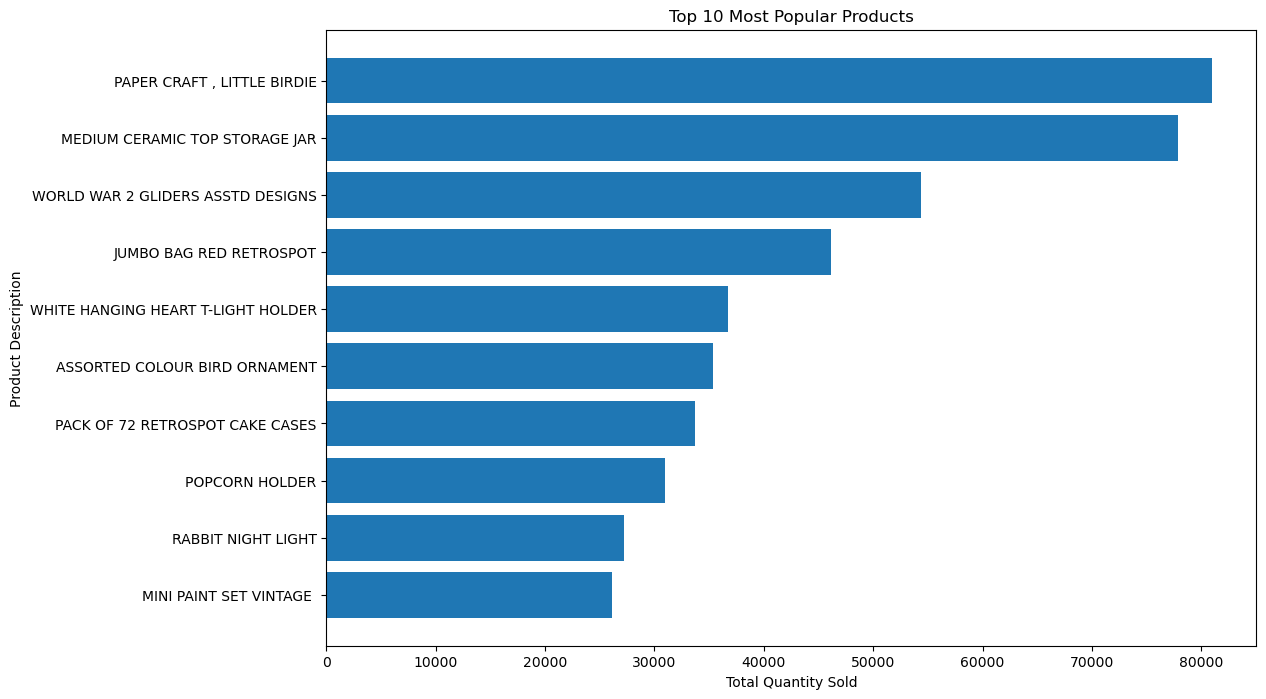

In [48]:
top_10 = product_sales_sorted.head(10)

plt.figure(figsize=(12,8))
plt.barh(top_10['Description'],top_10['Total_Sold'])
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Most Popular Products')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Are sales of certain products impacted by seasonality and certain holidays

In [59]:
# Time Series graph of little birdie paper craft WORLD WAR 2 GLIDERS ASSTD DESIGNS

glider_data = df[df['Description']== 'WORLD WAR 2 GLIDERS ASSTD DESIGNS']
glider_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
3259,536615,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:09:00,0.29,14047.0,United Kingdom,13.92
3297,536618,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:17:00,0.29,17017.0,United Kingdom,13.92
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,518.40
5047,536839,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2010-12-02 18:25:00,0.21,15093.0,United Kingdom,60.48
5278,536856,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-03 10:26:00,0.29,13370.0,United Kingdom,13.92
...,...,...,...,...,...,...,...,...,...
534024,581129,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-07 12:48:00,0.29,15498.0,United Kingdom,13.92
534797,581171,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-07 15:02:00,0.29,12615.0,France,13.92
538240,581403,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2011-12-08 13:46:00,0.29,13510.0,United Kingdom,13.92
538846,581419,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2011-12-08 15:03:00,0.21,15484.0,United Kingdom,60.48


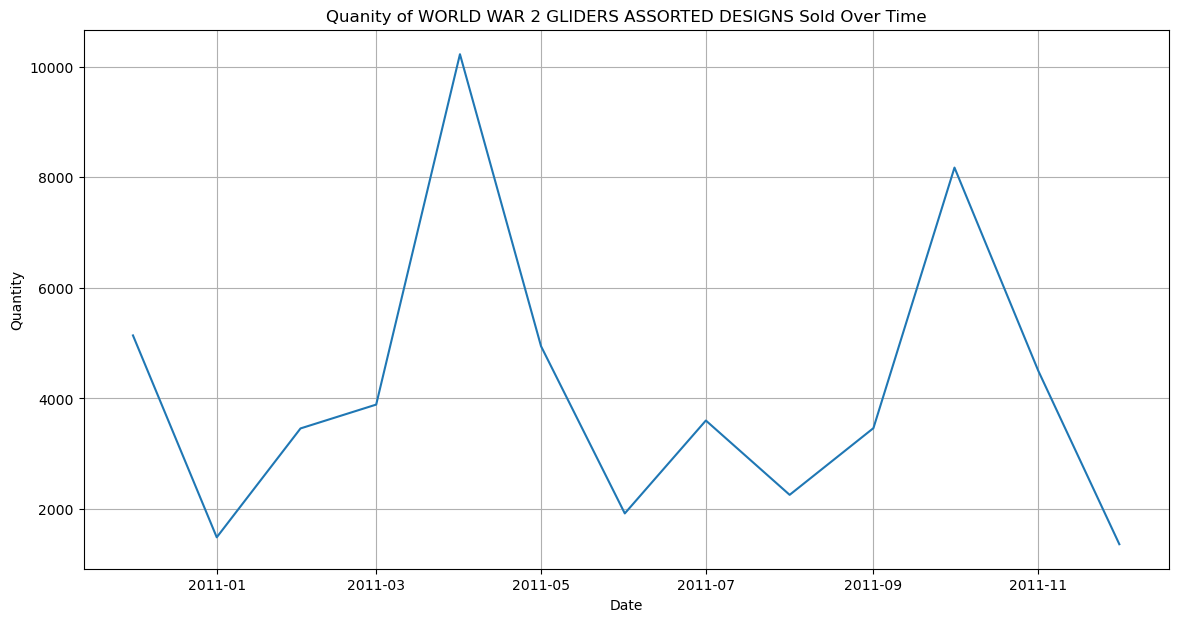

In [70]:
glider_sales_over_time = glider_data.groupby(glider_data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum().reset_index()
glider_sales_over_time['InvoiceDate'] = glider_sales_over_time['InvoiceDate'].dt.to_timestamp()

plt.figure(figsize = (14,7))
plt.plot(glider_sales_over_time['InvoiceDate'], glider_sales_over_time['Quantity'])
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quanity of WORLD WAR 2 GLIDERS ASSORTED DESIGNS Sold Over Time')
plt.grid()

In [73]:
popcorn_data = df[df['Description'] == 'POPCORN HOLDER']
popcorn_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
223184,556474,22197,POPCORN HOLDER,2,2011-06-12 12:01:00,0.85,16007.0,United Kingdom,1.70
223238,556475,22197,POPCORN HOLDER,3,2011-06-12 12:03:00,0.85,18109.0,United Kingdom,2.55
223708,556488,22197,POPCORN HOLDER,4,2011-06-12 13:52:00,0.85,16018.0,United Kingdom,3.40
224392,556520,22197,POPCORN HOLDER,12,2011-06-13 11:10:00,0.85,14177.0,United Kingdom,10.20
224446,556527,22197,POPCORN HOLDER,3,2011-06-13 11:33:00,0.85,16205.0,United Kingdom,2.55
...,...,...,...,...,...,...,...,...,...
540070,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom,1080.00
540071,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949.0,United Kingdom,864.00
540321,581476,22197,POPCORN HOLDER,100,2011-12-09 08:48:00,0.72,12433.0,Norway,72.00
541678,581538,22197,POPCORN HOLDER,4,2011-12-09 11:34:00,0.85,14446.0,United Kingdom,3.40


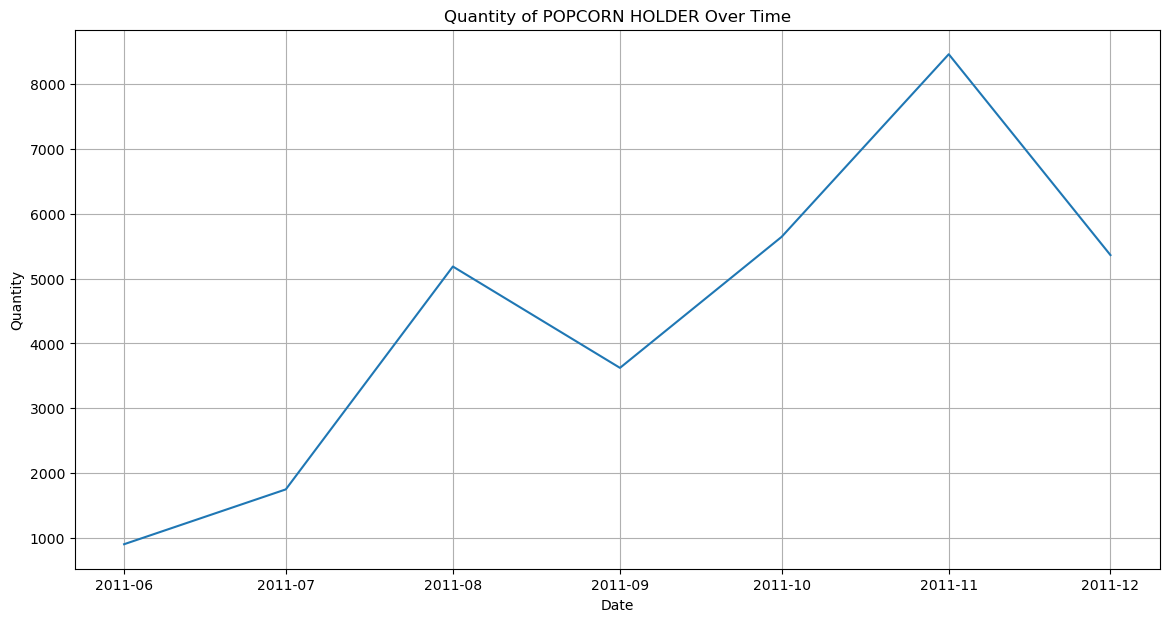

In [81]:
popcorn_data_over_time = popcorn_data.groupby(popcorn_data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum().reset_index()
popcorn_data_over_time['InvoiceDate'] = popcorn_data_over_time['InvoiceDate'].dt.to_timestamp()

plt.figure(figsize = (14,7))
plt.plot(popcorn_data_over_time['InvoiceDate'], popcorn_data_over_time['Quantity'])
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quantity of POPCORN HOLDER Over Time')
plt.grid()

In [83]:
# Is there a statistically significant difference in sales during the holdidays months (November)
# compared to others (March)

In [95]:
november_sales = df[(df['InvoiceDate'].dt.month == 11) & (df['InvoiceDate'].dt.year == 2011)]['Quantity']
march_sales = df[(df['InvoiceDate'].dt.month == 3) & (df['InvoiceDate'].dt.year == 2011)]['Quantity']

# check normality assumption for t-test
print(stats.shapiro(november_sales))
print(stats.shapiro(march_sales))

# check variance
print(stats.levene(november_sales, march_sales))

ShapiroResult(statistic=0.202381432056427, pvalue=0.0)
ShapiroResult(statistic=0.21440821886062622, pvalue=0.0)
LeveneResult(statistic=63.07248177574732, pvalue=2.014785403826302e-15)


In [98]:
t_stat, p_value = stats.ttest_ind(november_sales, march_sales, equal_var=False)

print("T-Statistic: {}".format(t_stat))
print("p-value: {}".format(p_value))

if p_value < 0.05:
    print("The difference in sales between November and March are statistically significant.")
else:
    print("There is no statistical significance between November and March sales")

T-Statistic: -8.844858351959235
p-value: 9.508165097584817e-19
The difference in sales between November and March are statistically significant.
